Vasmos a cargar el dataset de AirBnB descargado de [aquí](https://public.opendatasoft.com/explore/dataset/airbnb-listings/export/?disjunctive.host_verifications&disjunctive.amenities&disjunctive.features&q=Madrid&dataChart=eyJxdWVyaWVzIjpbeyJjaGFydHMiOlt7InR5cGUiOiJjb2x1bW4iLCJmdW5jIjoiQ09VTlQiLCJ5QXhpcyI6Imhvc3RfbGlzdGluZ3NfY291bnQiLCJzY2llbnRpZmljRGlzcGxheSI6dHJ1ZSwiY29sb3IiOiJyYW5nZS1jdXN0b20ifV0sInhBeGlzIjoiY2l0eSIsIm1heHBvaW50cyI6IiIsInRpbWVzY2FsZSI6IiIsInNvcnQiOiIiLCJzZXJpZXNCcmVha2Rvd24iOiJyb29tX3R5cGUiLCJjb25maWciOnsiZGF0YXNldCI6ImFpcmJuYi1saXN0aW5ncyIsIm9wdGlvbnMiOnsiZGlzanVuY3RpdmUuaG9zdF92ZXJpZmljYXRpb25zIjp0cnVlLCJkaXNqdW5jdGl2ZS5hbWVuaXRpZXMiOnRydWUsImRpc2p1bmN0aXZlLmZlYXR1cmVzIjp0cnVlfX19XSwidGltZXNjYWxlIjoiIiwiZGlzcGxheUxlZ2VuZCI6dHJ1ZSwiYWxpZ25Nb250aCI6dHJ1ZX0%3D&location=16,41.38377,2.15774&basemap=jawg.streets)

![](img/descargar.png)

In [1]:
airbnb<-read.csv('data/airbnb-listings.csv',sep = ';')
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

Vamos a quedarnos con las columnas de mayor interés:

'City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude'

In [2]:
airbnb<-airbnb[,c('City','Room.Type','Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude','Longitude')]

Nos quedarmos solo con las entradas de Madrid para Room.Type=="Entire home/apt" y cuyo barrio (Neighbourhood) no está vacio ''
Podemos eliminar las siguientes columnas que ya no son necesarias:
"Room.Type",'City'

Llama a nuevo dataframe df_madrid.

In [3]:
df_madrid <- airbnb[airbnb$City=="Madrid" & airbnb$Room.Type=="Entire home/apt" & airbnb$Neighbourhood != "",
      c('Neighbourhood','Accommodates','Bathrooms','Bedrooms','Beds','Price','Square.Feet','Guests.Included','Extra.People','Review.Scores.Rating','Latitude', 'Longitude')]
print("La estructura de df_madrid:")
str(df_madrid)

[1] "La estructura de df_madrid:"
'data.frame':	5601 obs. of  12 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 257 257 257 179 179 179 179 179 179 179 ...
 $ Accommodates        : int  3 5 6 4 4 2 2 6 6 2 ...
 $ Bathrooms           : num  1 2 1 1 1 1 1 1 1 1 ...
 $ Bedrooms            : int  0 2 2 1 1 1 0 3 3 0 ...
 $ Beds                : int  2 3 4 2 1 1 1 3 6 1 ...
 $ Price               : int  65 100 89 49 89 61 72 85 170 60 ...
 $ Square.Feet         : int  NA NA NA 0 NA NA NA NA NA NA ...
 $ Guests.Included     : int  2 4 2 2 2 1 1 1 1 1 ...
 $ Extra.People        : int  10 25 10 20 15 0 0 0 0 0 ...
 $ Review.Scores.Rating: int  96 97 94 89 97 95 88 78 NA 89 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.71 -3.71 -3.71 -3.71 -3.71 ...


¿Que porcentaje de los apartamentos no muestran los metros cuadrados? Es decir, ¿cuantos tienen NA en Square.Meters?

In [4]:
#Creo la columna de Square.Meters
df_madrid$Square.Meters <- df_madrid$Square.Feet*0.3048

In [5]:
# Obtengo los porcentajes de los valores que son NA en el dataframe por columnas
percentages = colMeans(is.na(df_madrid))
# Imprimo el porcentaje que corresponde a Square.Meters
print(
    paste(
        "El porcentaje de NA en Square.Meters es:",
        round(percentages["Square.Meters"]*100, 2)
    )
)

[1] "El porcentaje de NA en Square.Meters es: 93.8"


De todos los apartamentos que tienen un valor de metros cuadrados diferente de NA 
¿Que porcentaje de los apartamentos tienen 0 metros cuadrados?

In [6]:
# Obtengo los valores que no son NA de Meters
rowsNoNA <- df_madrid$Square.Meters[!is.na(df_madrid$Square.Meters)]
#Calculo el porcentaje de valores a 0
percent0 <- round( ( sum(rowsNoNA == 0) / length(rowsNoNA) ) * 100, 2)
#Imprimo el resultado en %
print(
    paste(
        "El porcentaje de 0 en Square.Meters que no son NA es:",
        percent0
    )
)

[1] "El porcentaje de 0 en Square.Meters que no son NA es: 36.89"


Reemplazar todos los 0m^2 por NA 

In [7]:
df_madrid$Square.Meters[df_madrid$Square.Meters == 0] <- NA

Son muchos, vamos a intentar crear un modelo que nos prediga cuantos son los metros cuadrados en función del resto de variables para tratar de rellenar esos NA.

Antes de eso deberíamos pintar el histograma de los metros cuadrados y ver si tenemos que filtrar algún elemento más.

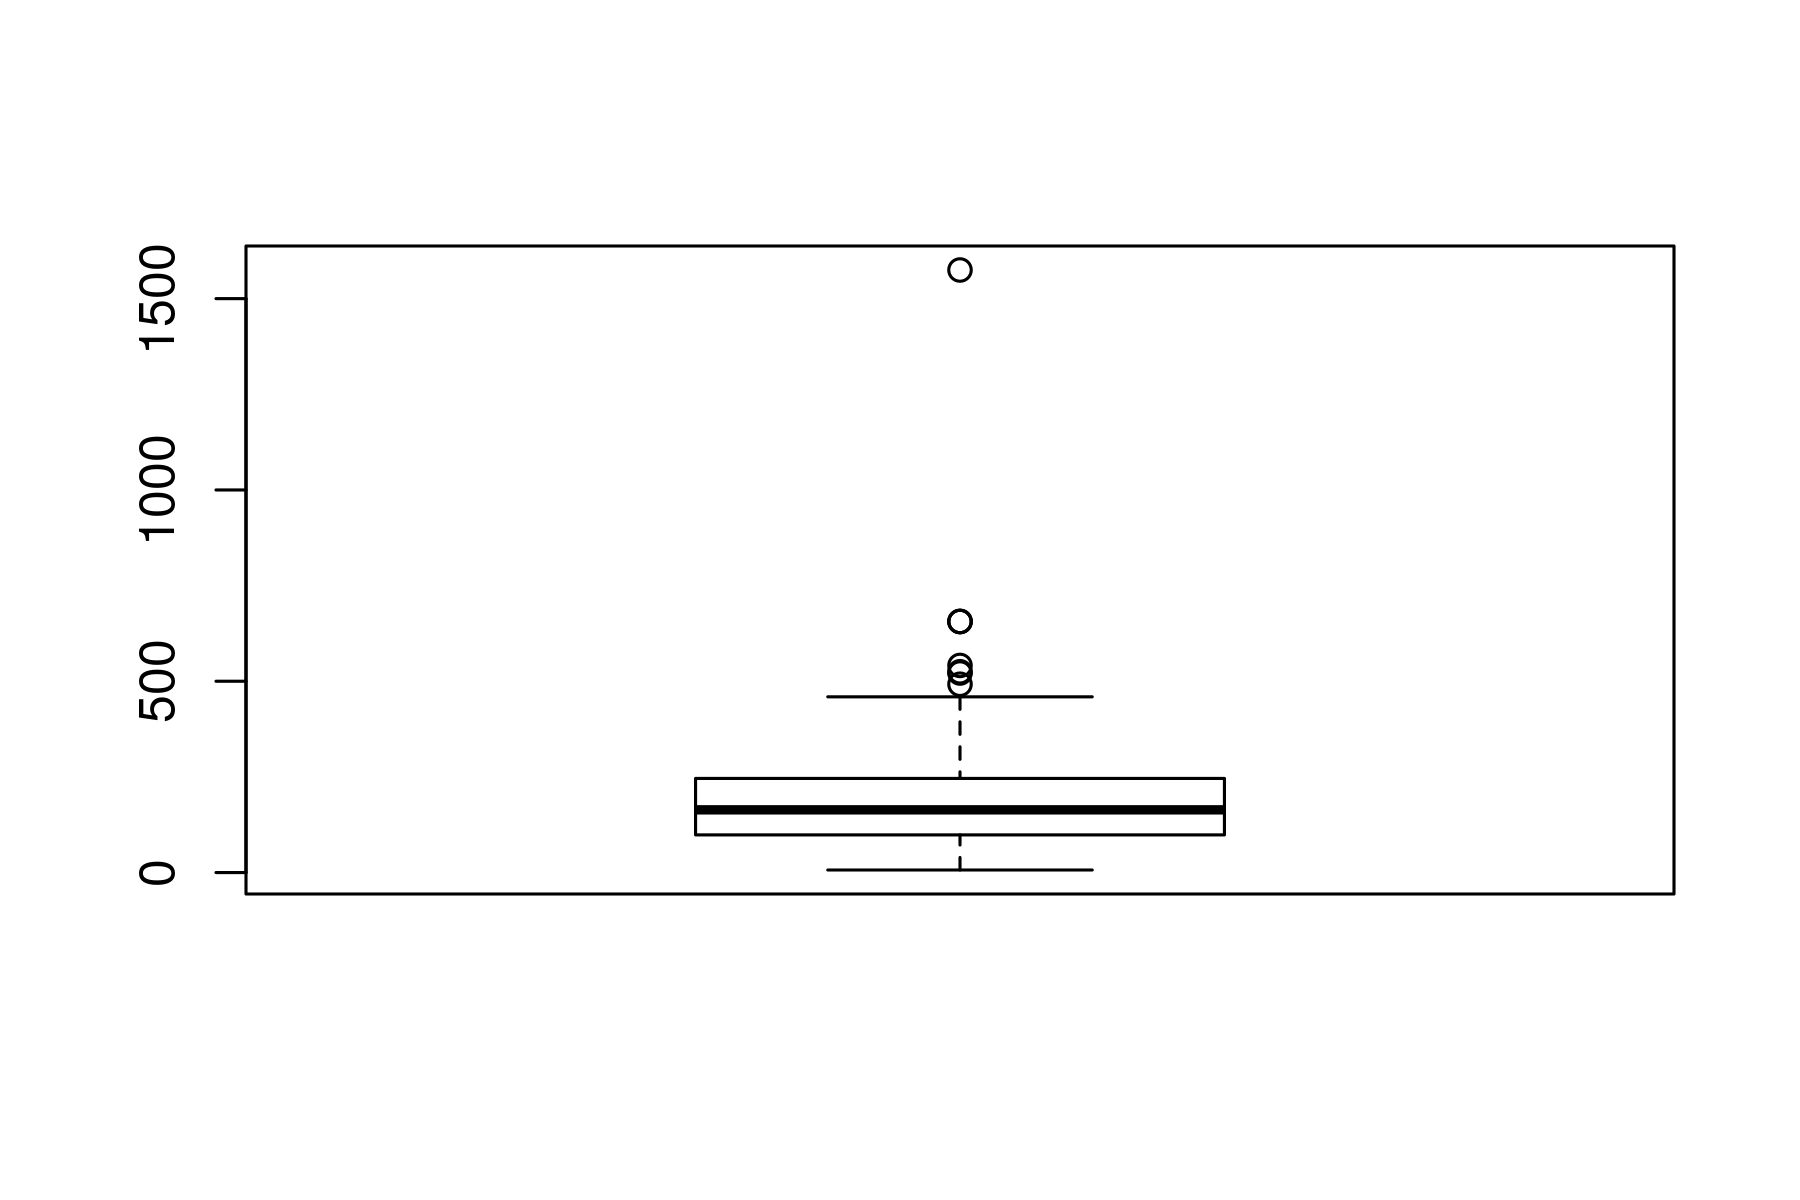

In [8]:
#Primero visualizo boxplot para ver donde están nuestros principales valores
boxplot(df_madrid$Square.Meters)

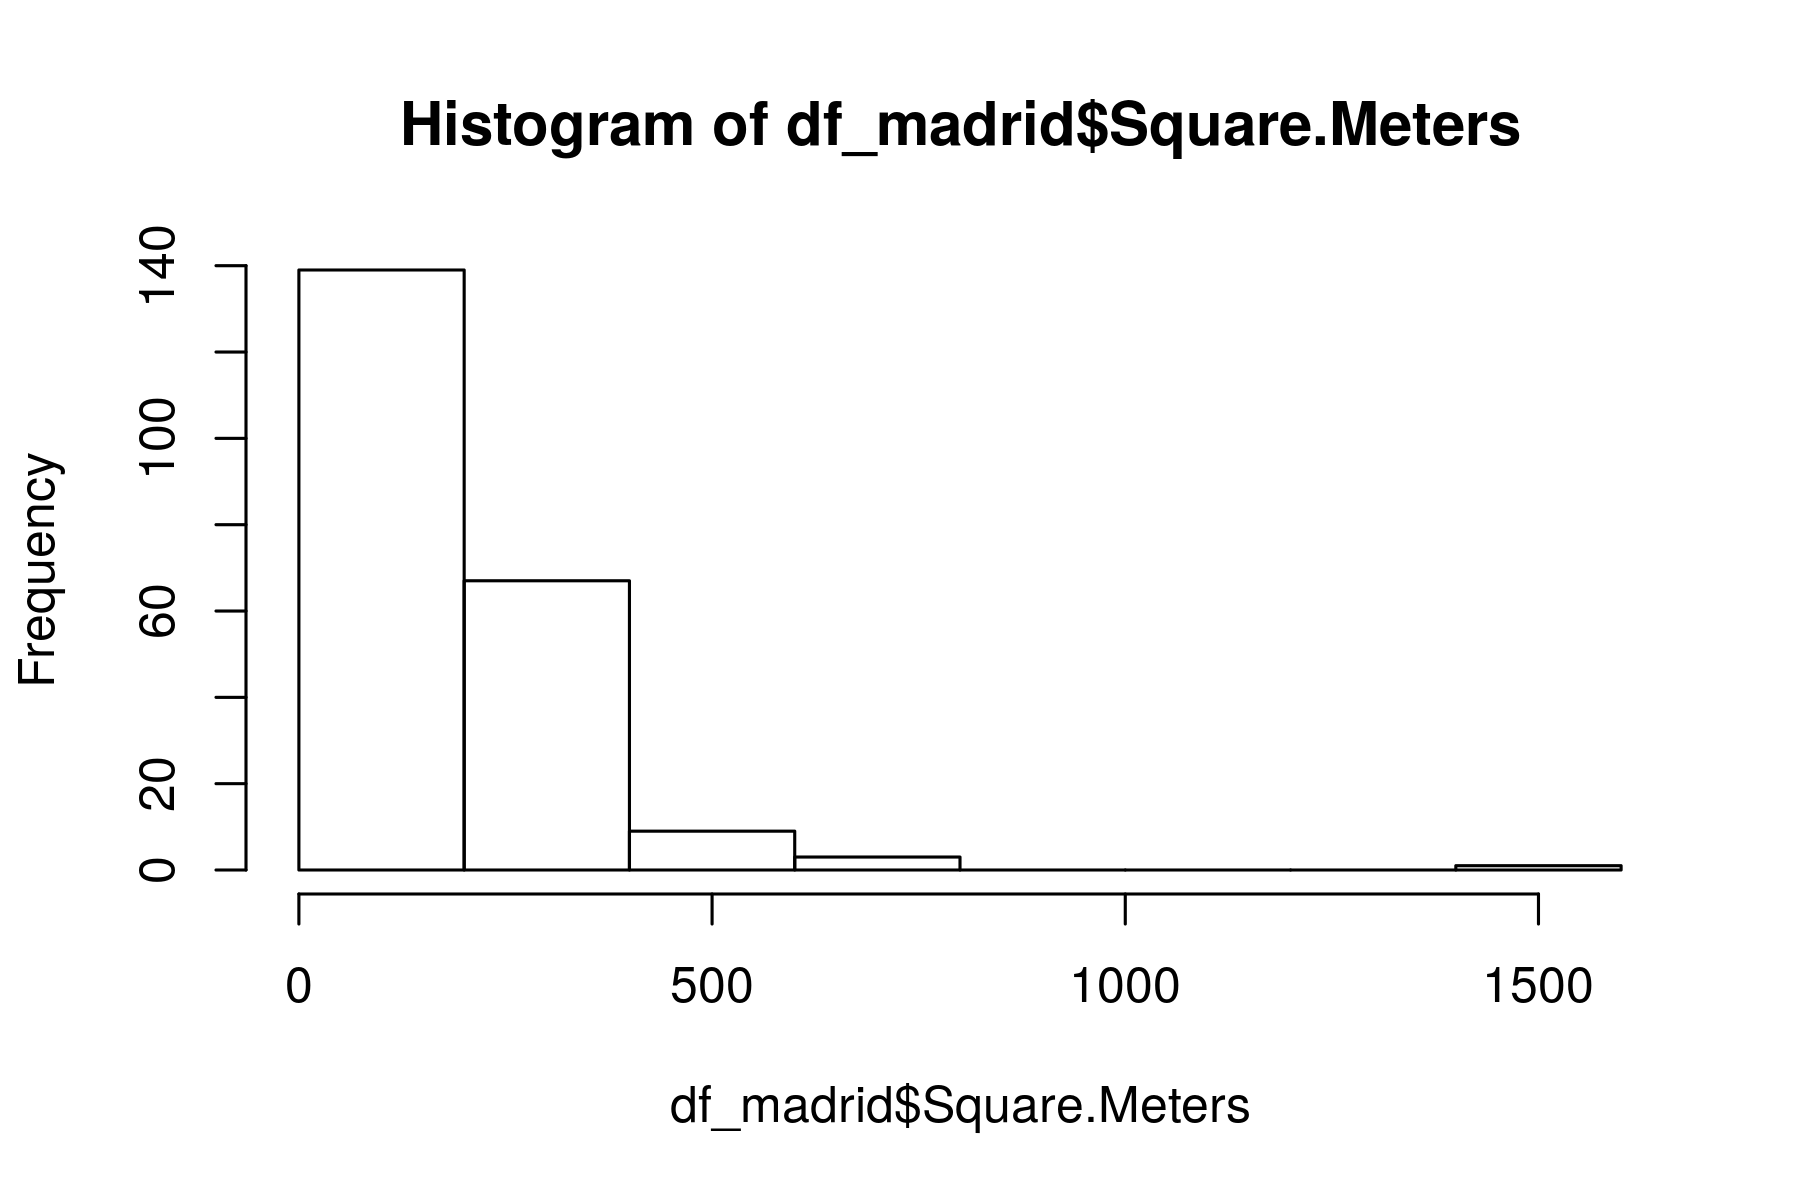

In [9]:
#Me ayudo de varios histogramas para verificar qué valores debería quitarme
hist(df_madrid$Square.Meters, breaks=10)

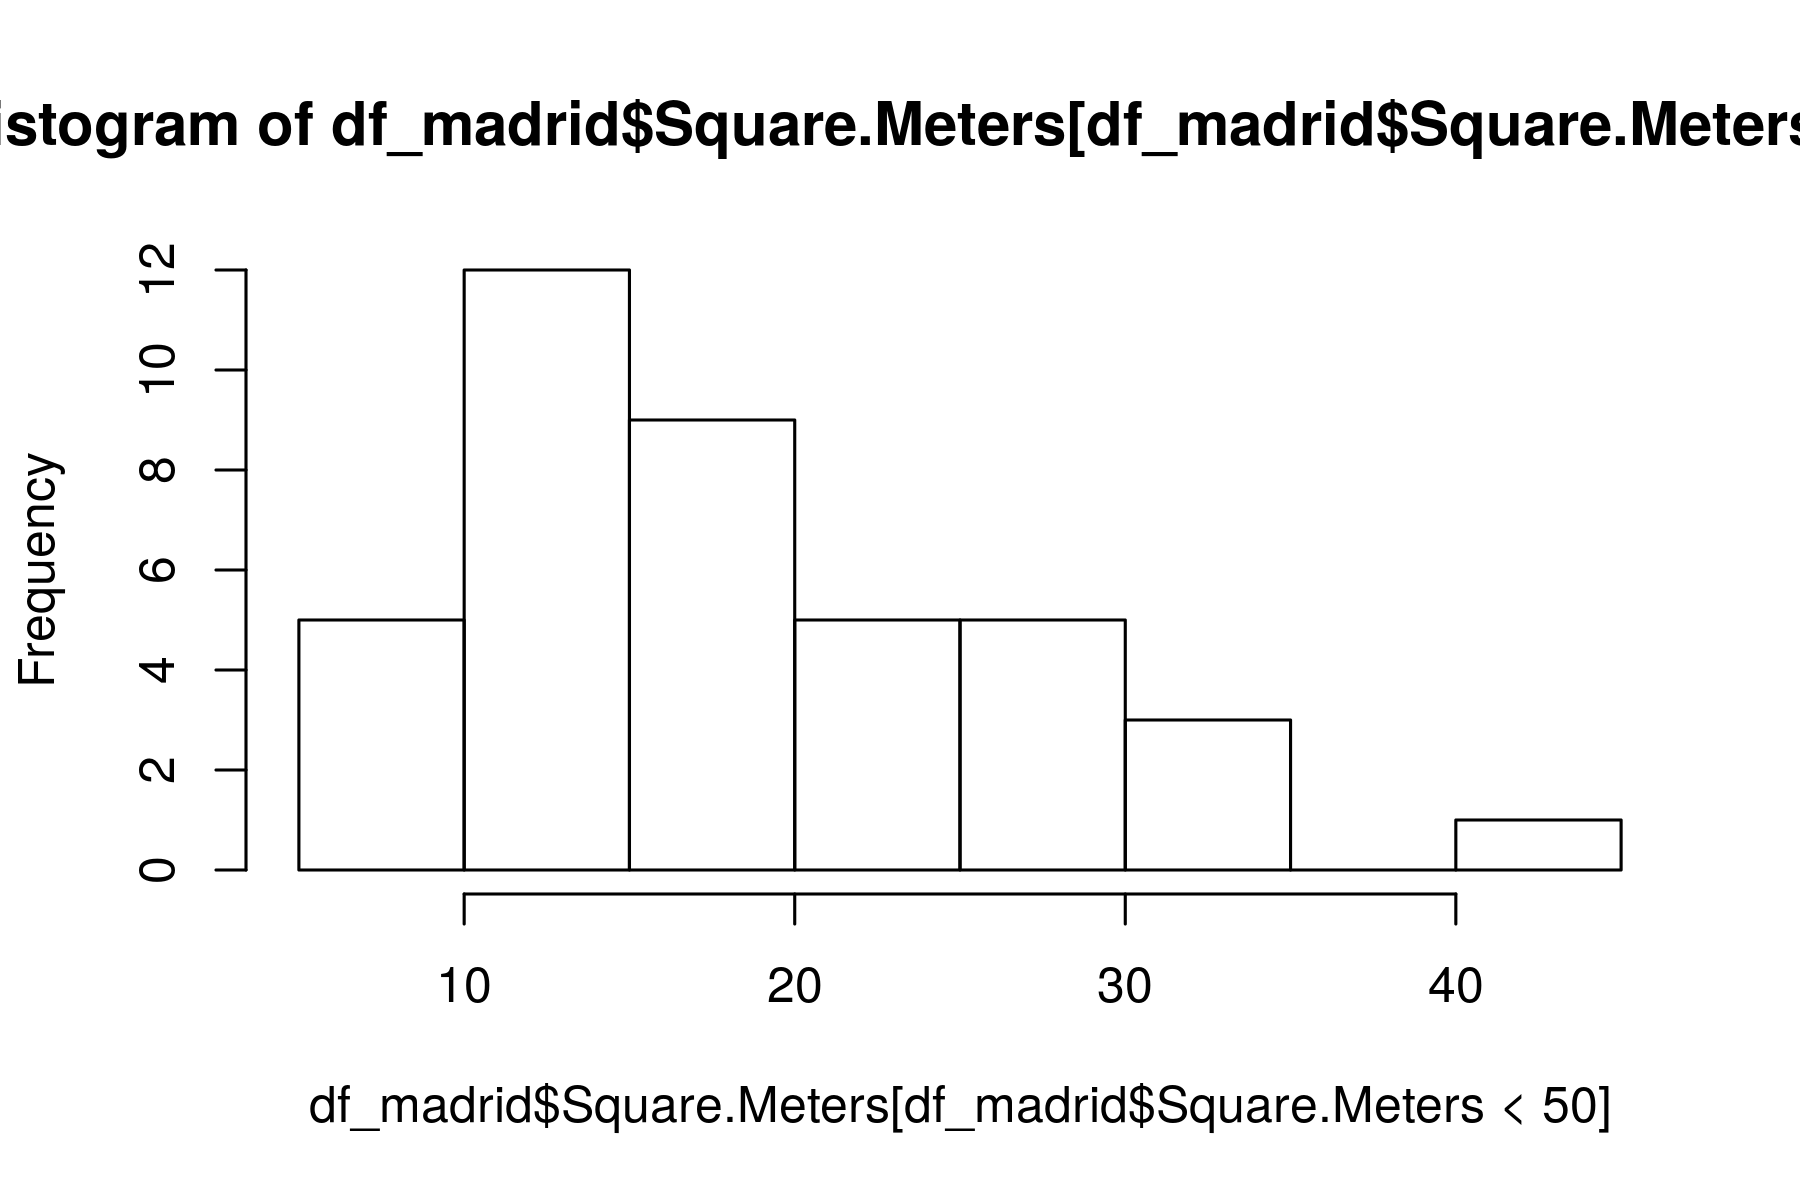

In [10]:
hist(df_madrid$Square.Meters[df_madrid$Square.Meters < 50], breaks=10)

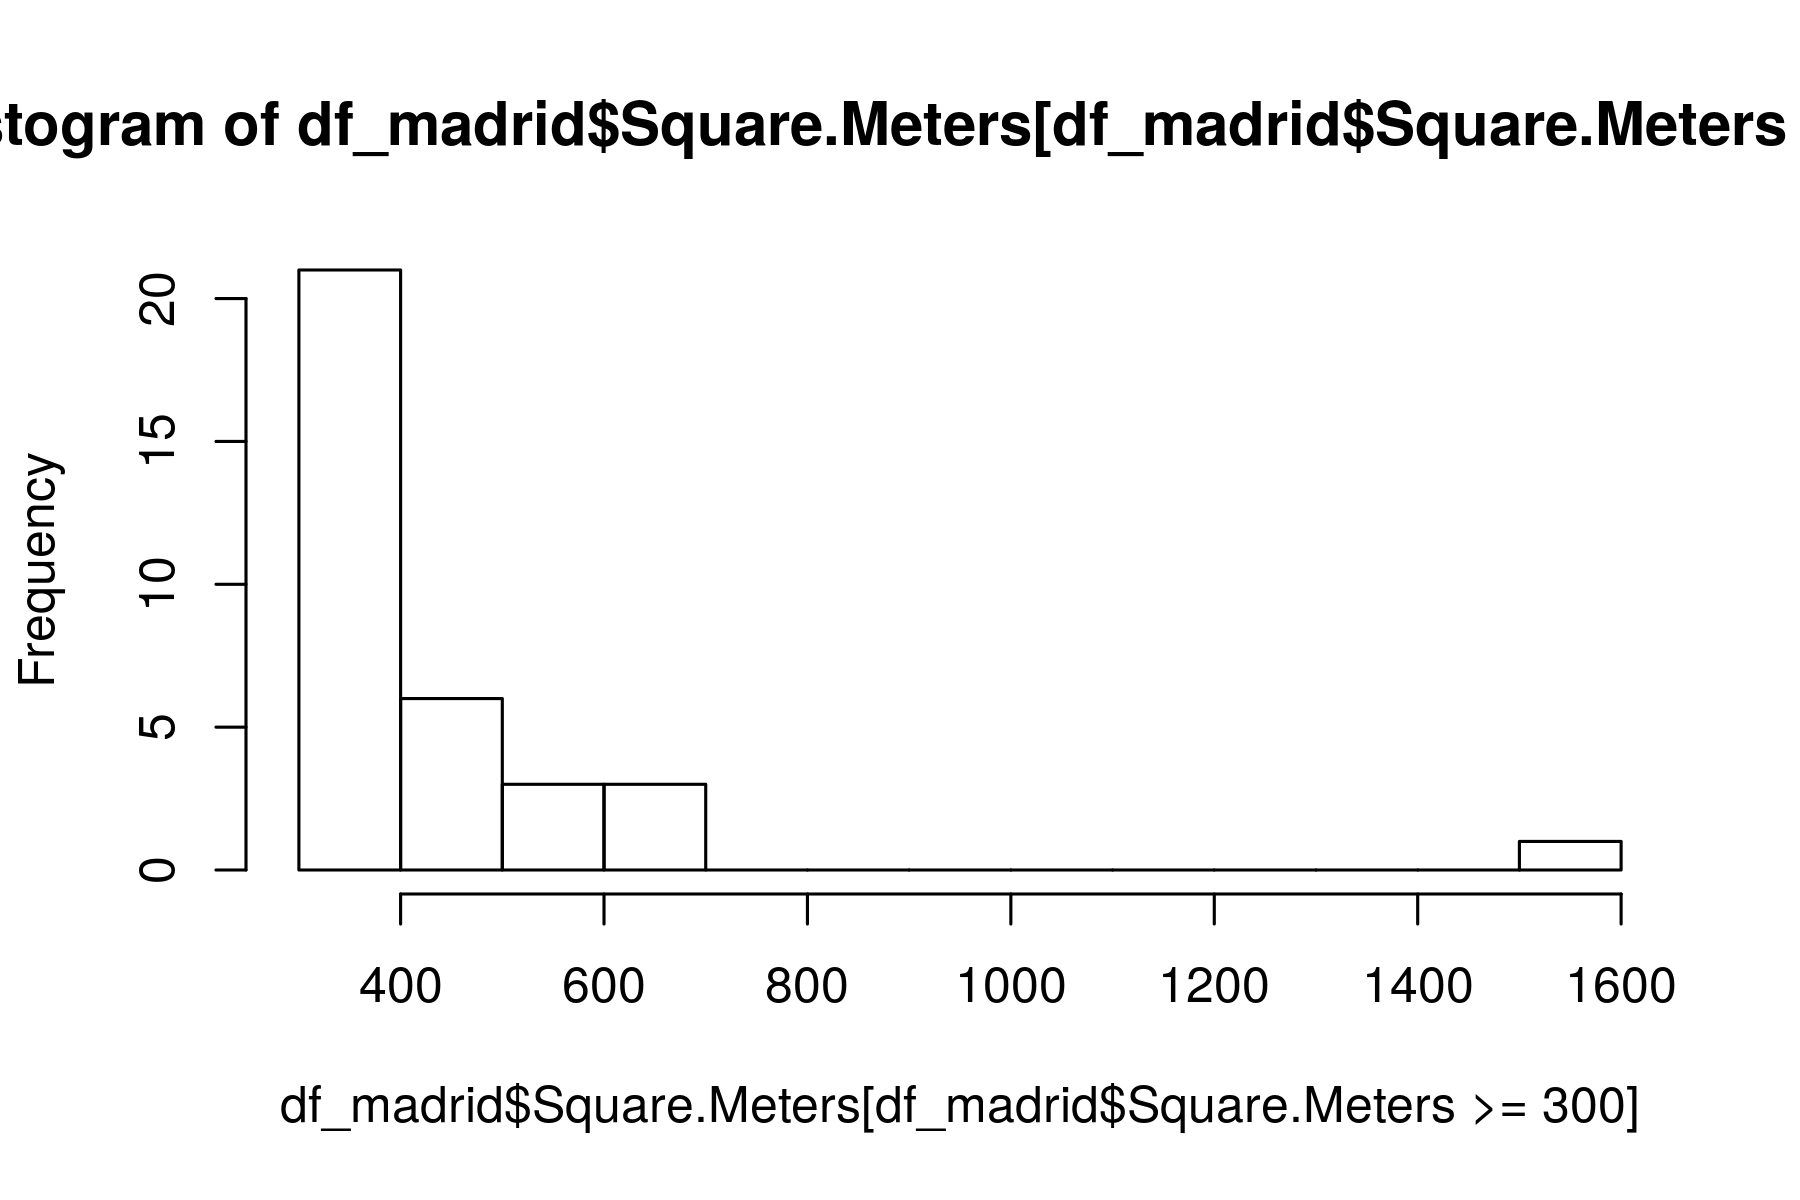

In [11]:
hist(df_madrid$Square.Meters[df_madrid$Square.Meters >= 300], breaks=10)

Asigna el valor NA a la columna Square.Meters de los apartamentos que tengan menos de 20 m^2

In [12]:
#La recomendación de la práctica es quitar los que tengan menos de 20, vamos a hacer caso por supuesto
#Pero también decido quitarme (aún a riesgo de perjudicar en todo el resto del ejercicio) los que están por encima de 400
df_madrid$Square.Meters[!is.na(df_madrid$Square.Meters) & df_madrid$Square.Meters < 20] <- NA

El barrio parece ser un indicador importante para los metros cuadrados de un apartamento.

Vamos a agrupar los barrios por metros cuadrados. Podemos usar una matriz de similaridad de Tukey tal y como hicimos en el curso de estadística:

Warning message in resm[lower.tri(resm)] <- round(tky.result$p.adj, 4):
“number of items to replace is not a multiple of replacement length”


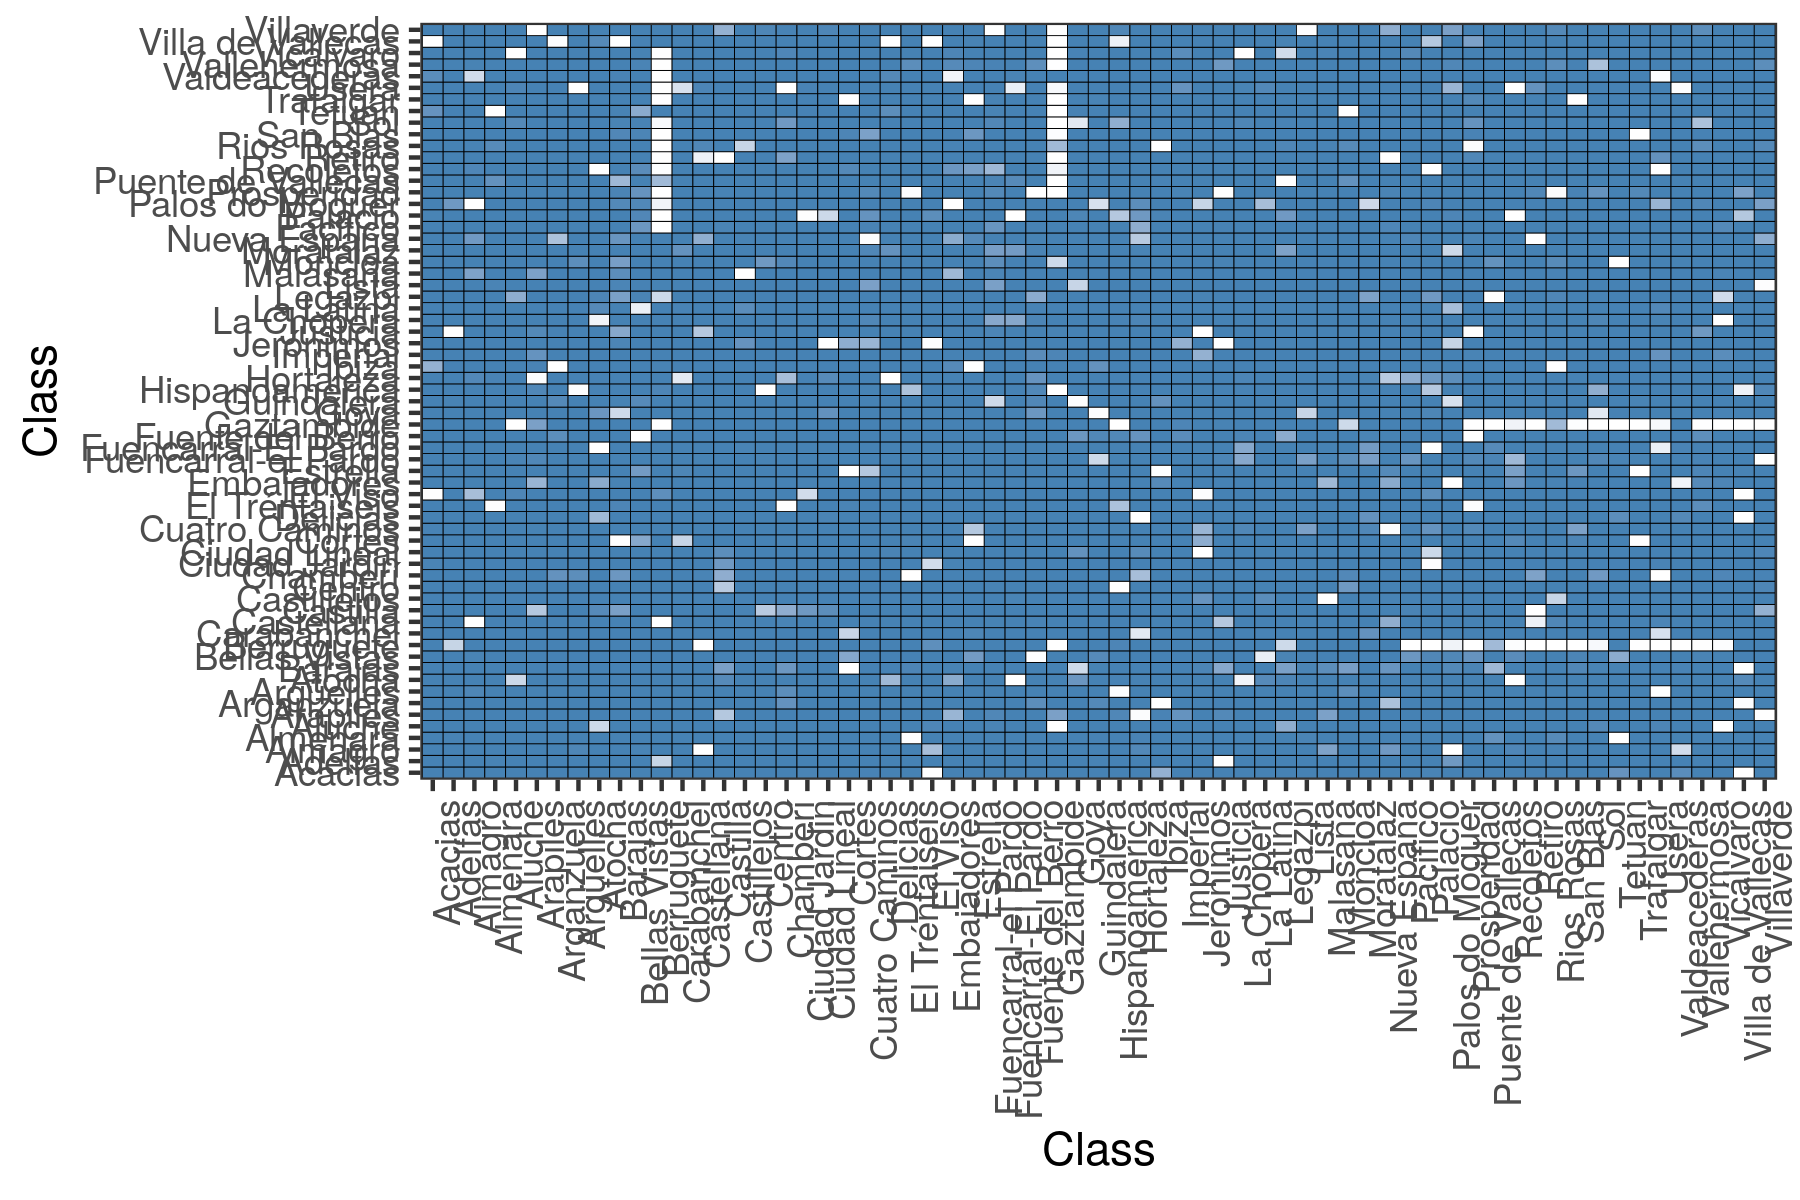

In [13]:
tky<-TukeyHSD(aov( formula=Square.Meters~Neighbourhood, data=df_madrid ))
tky.result<-data.frame(tky$Neighbourhood)
cn <-sort(unique(df_madrid$Neighbourhood))
resm <- matrix(NA, length(cn),length(cn))
rownames(resm) <- cn
colnames(resm) <- cn
resm[lower.tri(resm) ] <- round(tky.result$p.adj,4)
resm[upper.tri(resm) ] <- t(resm)[upper.tri(resm)] 
diag(resm) <- 1
library(ggplot2)
library(reshape2)
dfResm <- melt(resm)
ggplot(dfResm, aes(x=Var1, y=Var2, fill=value))+
  geom_tile(colour = "black")+
  scale_fill_gradient(low = "white",high = "steelblue")+
  ylab("Class")+xlab("Class")+theme_bw()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1),legend.position="none")

Usando como variable de distancia: 1-resm
Dibuja un dendrograma de los diferentes barrios.


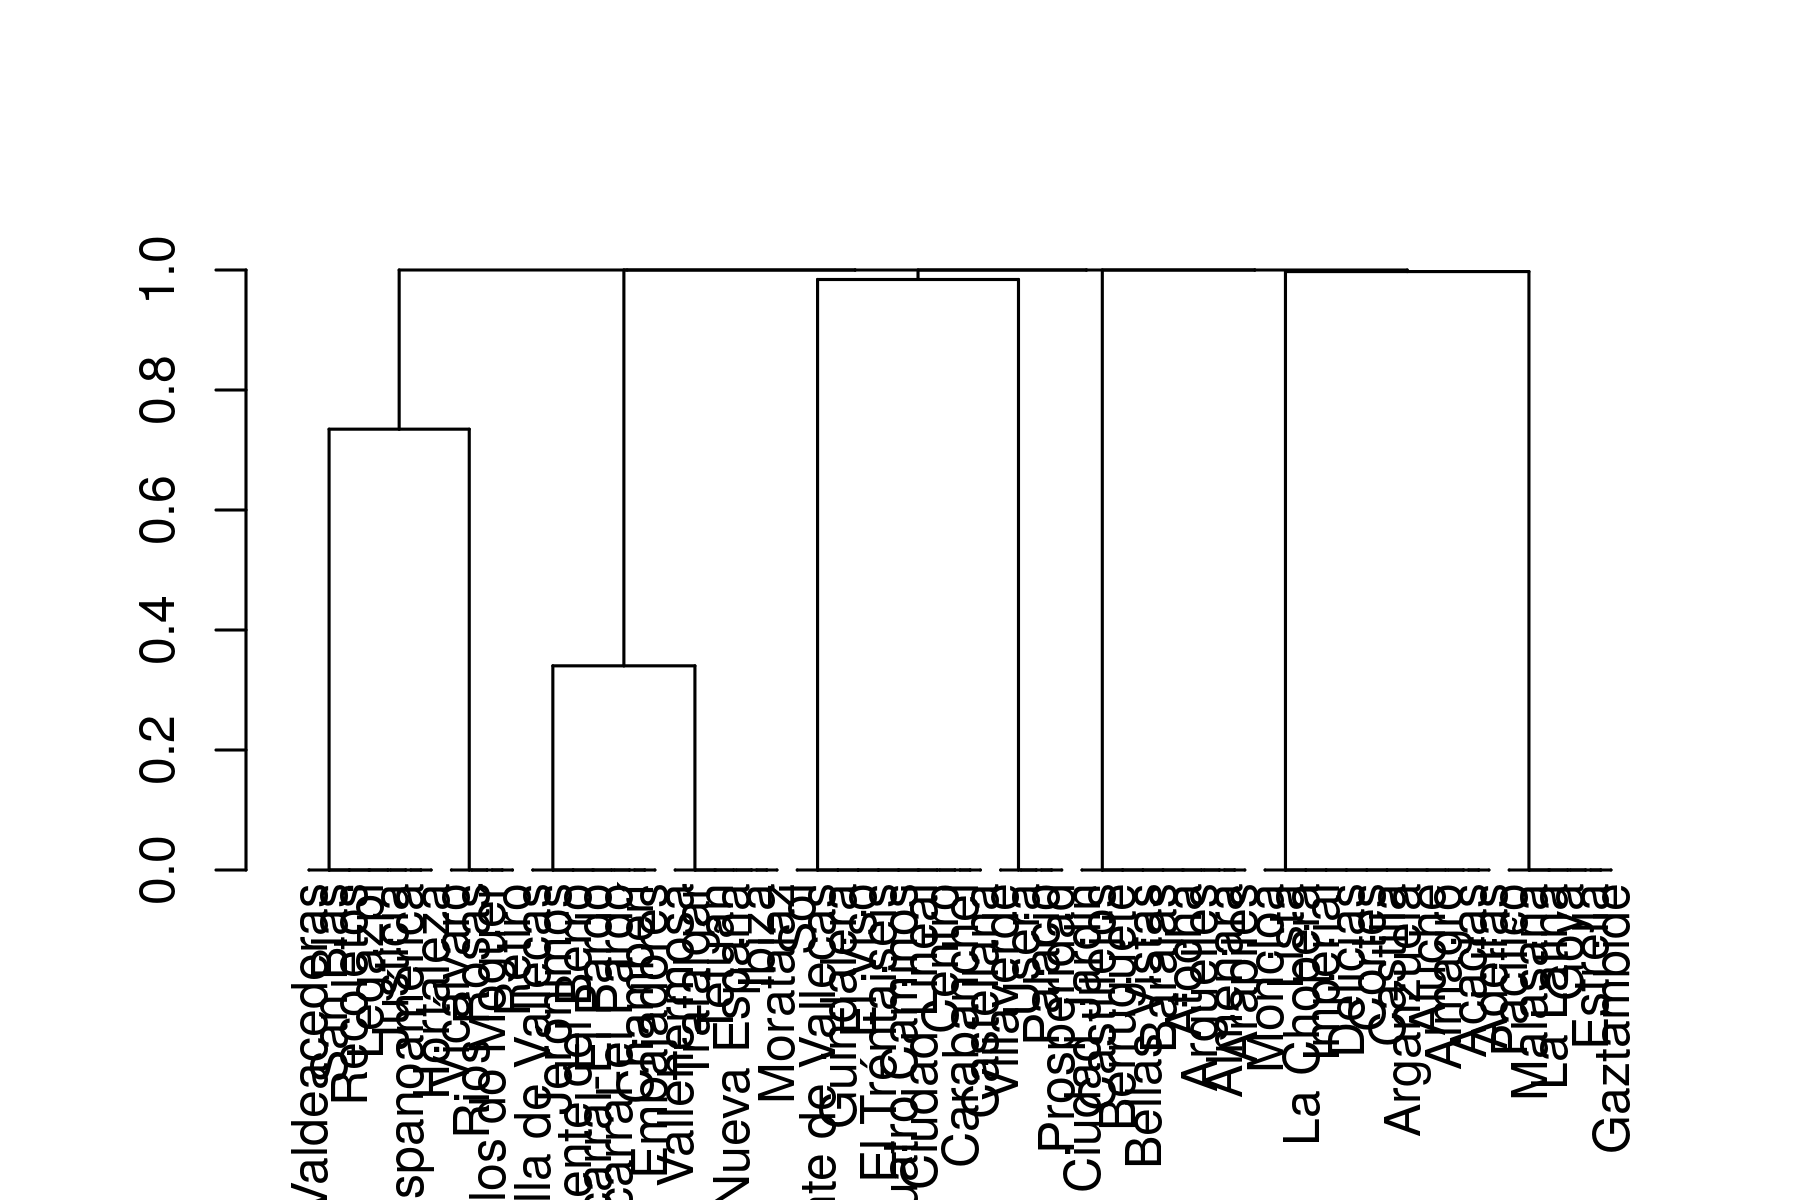

In [14]:
# Usamos 1-resm (la matriz anteriormente calculada) para mostrar un dendrograma
dendroDist <- as.dist(1- resm)
hClust <- hclust(dendroDist,method="complete")
hClustDendro <- as.dendrogram(hClust)
plot(hClustDendro)

Estableciendo un punto de corte en 0.9, ¿cuantos clusters aparecen?


---------------------
Welcome to dendextend version 1.13.4
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




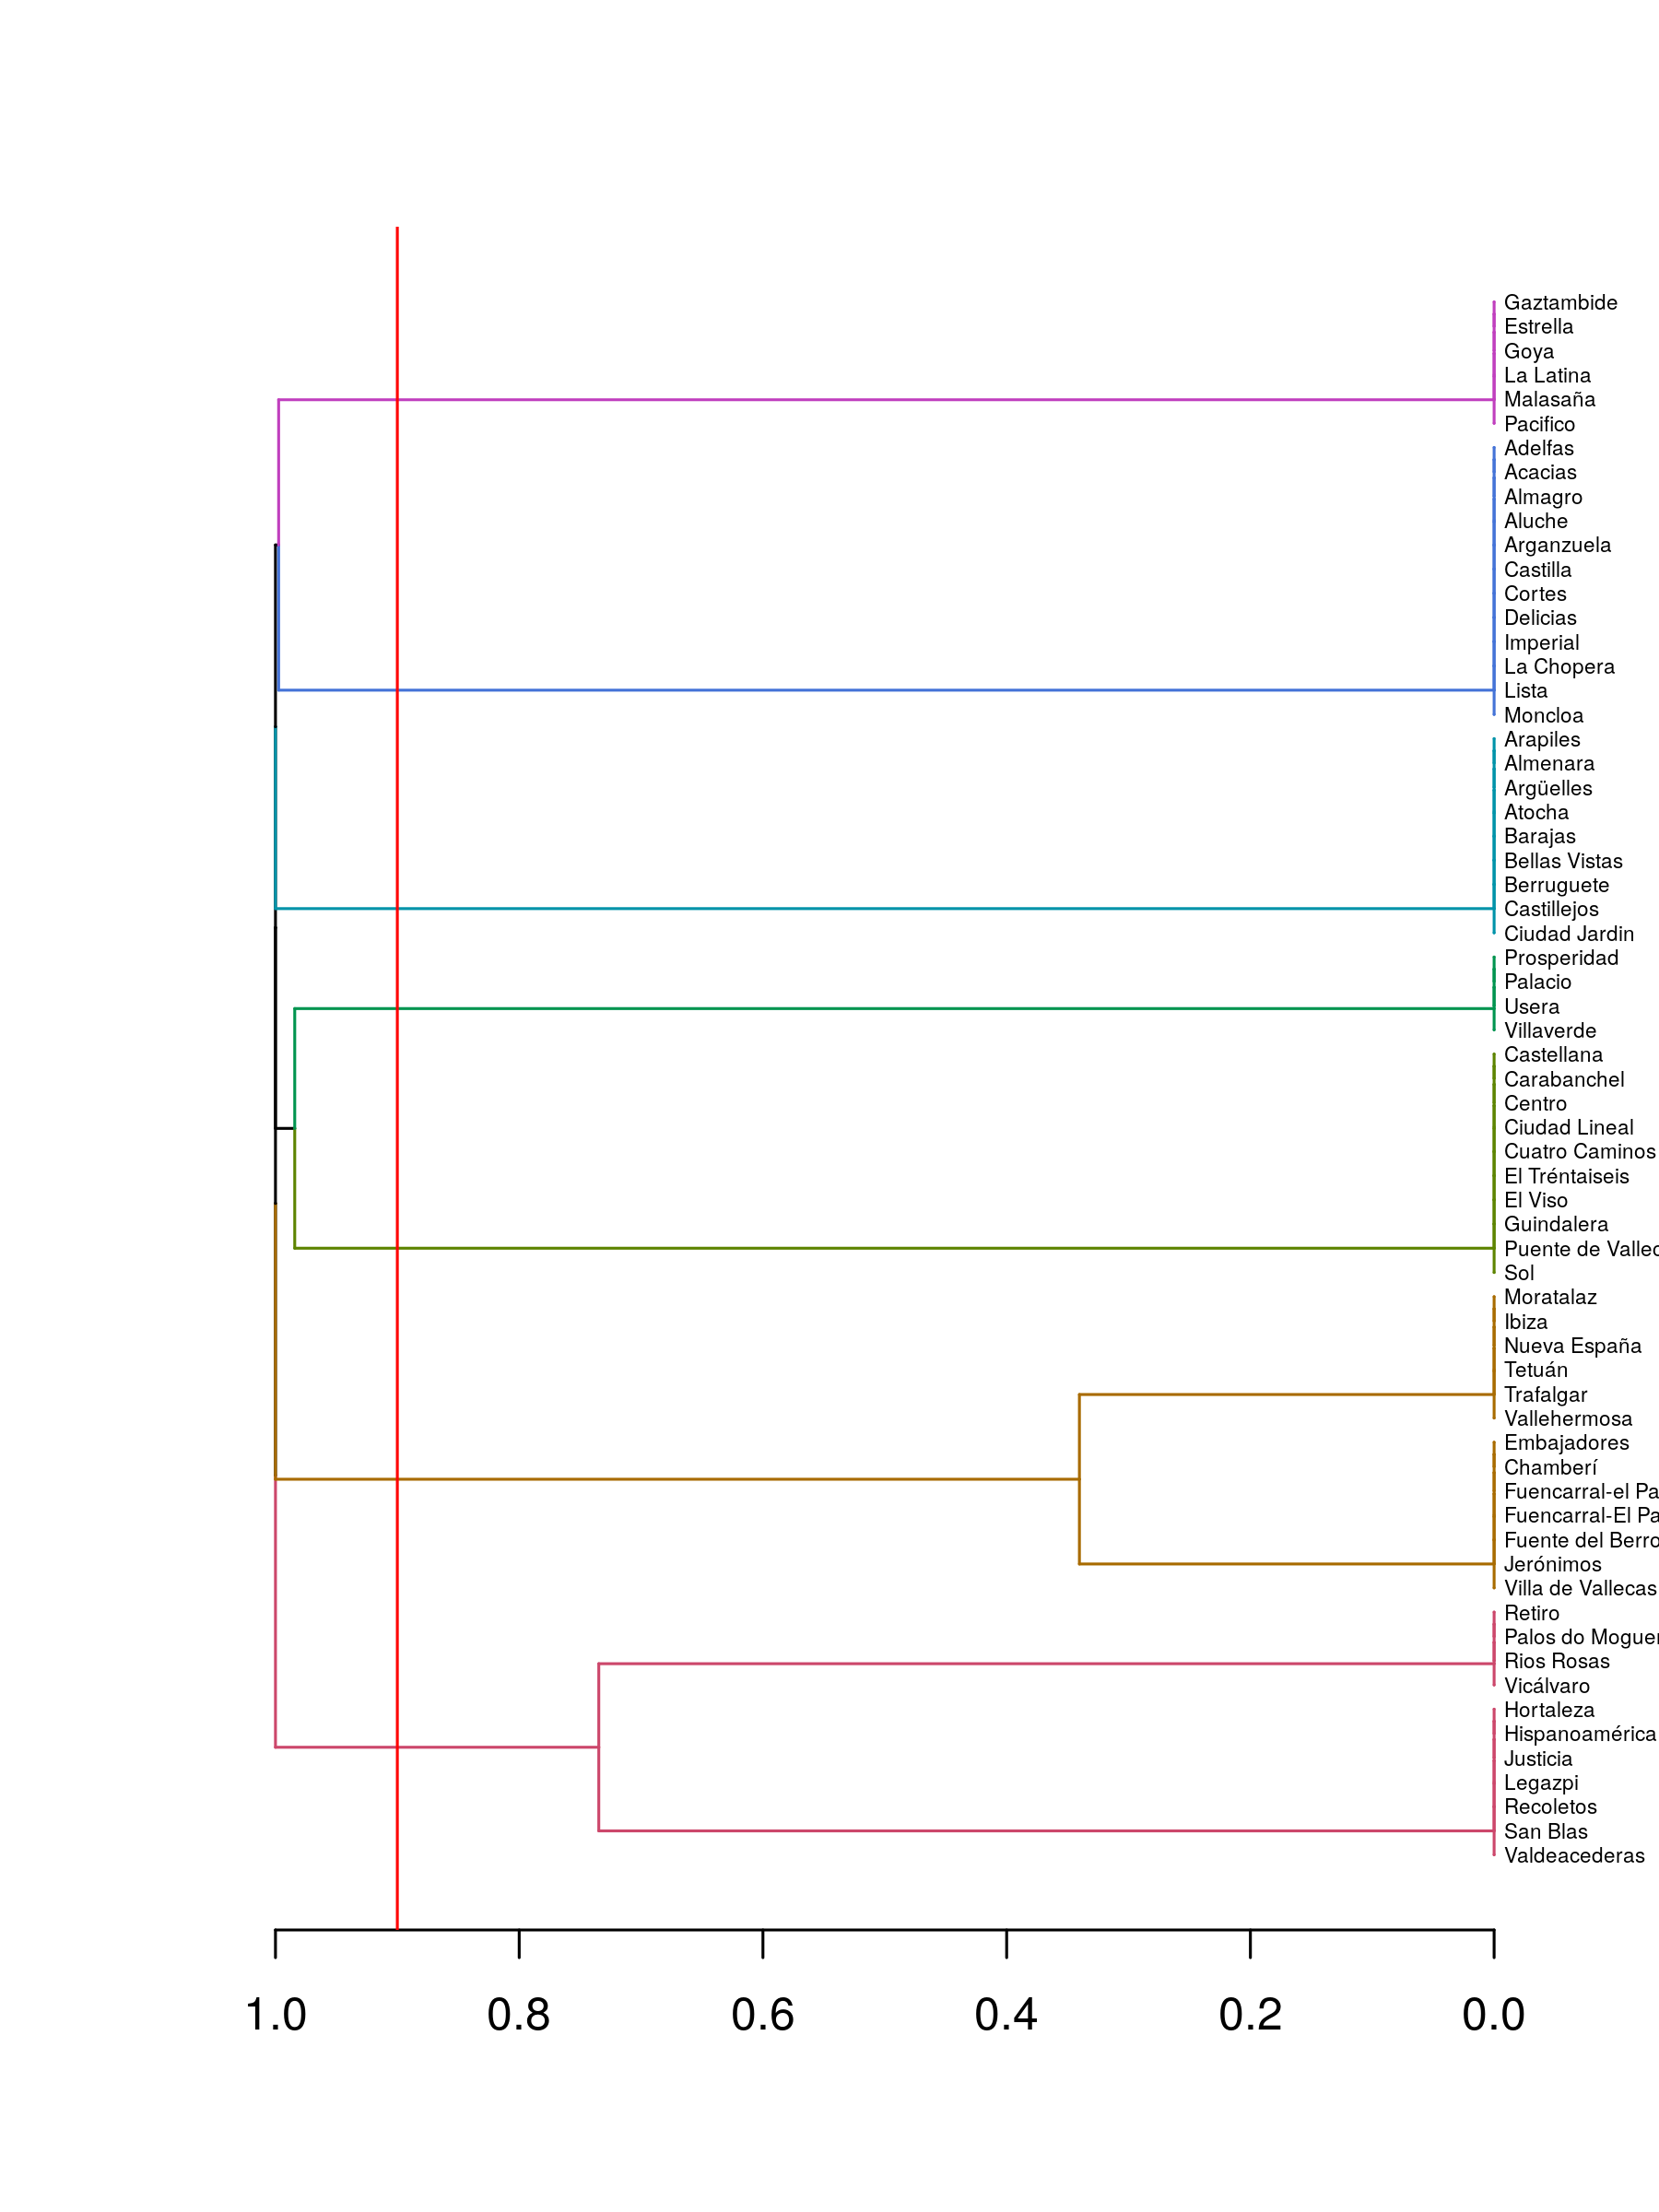

In [15]:
# Vamos a establecer el punto de corte en 0.9 para ver los clusters que aparecen
library(dendextend)
options(repr.plot.height=8,repr.plot.width=6,repr.plot.res = 300)
hClustDendro<-set(hClustDendro,"labels_cex", 0.45) 
plot(color_branches(hClustDendro,h=0.9),horiz=TRUE,cex=0)
abline(v=0.9,col="red")
options(repr.plot.height=4,repr.plot.width=6,repr.plot.res = 300)

In [16]:
print("Según podemos ver en las siguientes impresiones, existen 7 clusters con el corte en 0.9")

[1] "Según podemos ver en las siguientes impresiones, existen 7 clusters con el corte en 0.9"


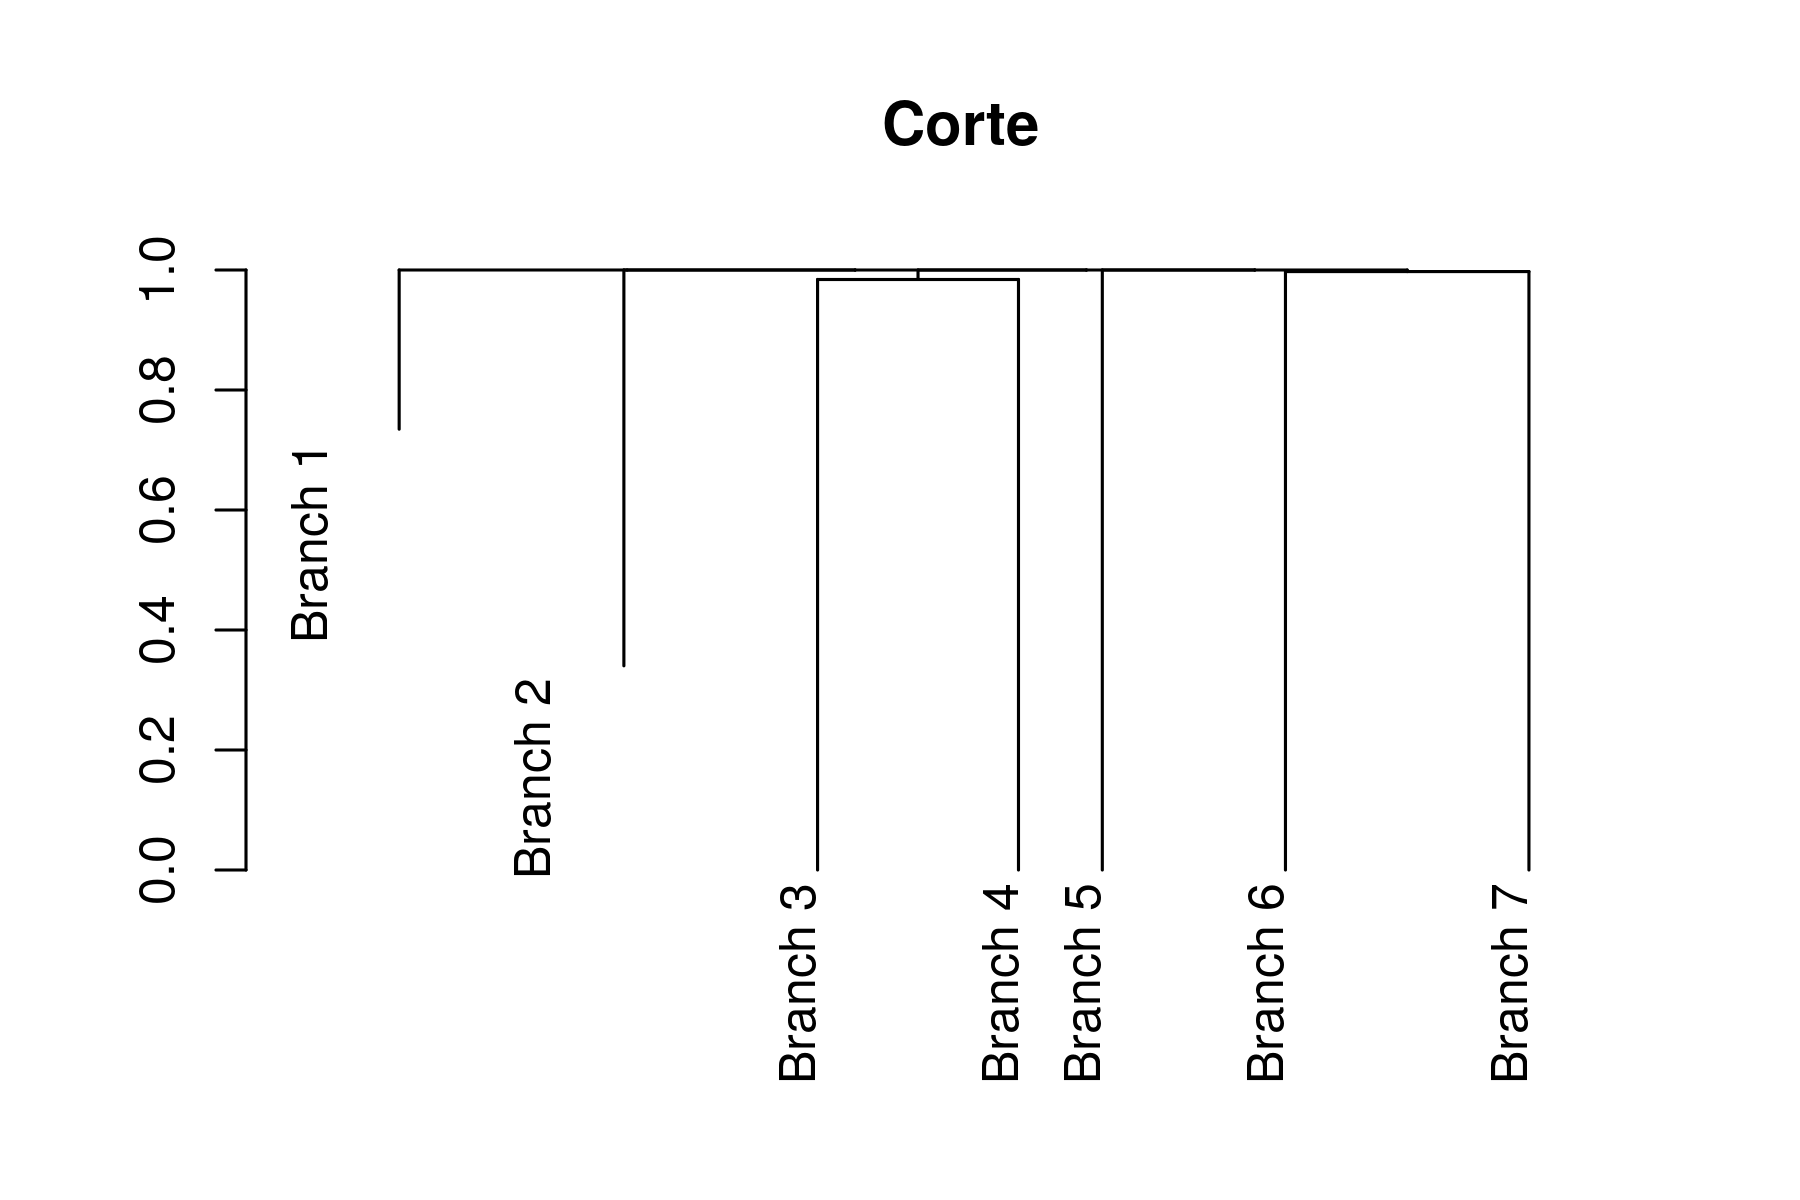

In [17]:
plot(cut(hClustDendro, h = 0.9)$upper, main = "Corte", cex=1)

In [18]:
cut(hClustDendro, h = 0.9)$lower

[[1]]
'dendrogram' with 2 branches and 11 members total, at height 0.7347 

[[2]]
'dendrogram' with 2 branches and 13 members total, at height 0.3403 

[[3]]
'dendrogram' with 2 branches and 10 members total, at height 0 

[[4]]
'dendrogram' with 2 branches and 4 members total, at height 0 

[[5]]
'dendrogram' with 2 branches and 9 members total, at height 0 

[[6]]
'dendrogram' with 2 branches and 12 members total, at height 0 

[[7]]
'dendrogram' with 2 branches and 6 members total, at height 0 


Vamos a crear una nueva columna en el dataframe df_madrid con un nuevo identificador marcado por los clusters obtenidos. Esta columna la llamaremos neighb_id

In [19]:
dfToMerge <- data.frame(cutree(hClustDendro,h=0.9))
names(dfToMerge)<-'neighb_id'
dfToMerge$Neighbourhood <- rownames(dfToMerge)
df_madrid <- merge(df_madrid, dfToMerge, by="Neighbourhood", all=T)
str(df_madrid)

'data.frame':	5601 obs. of  14 variables:
 $ Neighbourhood       : Factor w/ 391 levels "","Acacias","Acton",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ Accommodates        : int  3 2 6 2 4 3 4 2 2 5 ...
 $ Bathrooms           : num  1 1 1 1 1 1 2 1 1 2 ...
 $ Bedrooms            : int  1 1 2 2 1 1 2 1 0 2 ...
 $ Beds                : int  1 1 3 1 2 2 4 1 1 2 ...
 $ Price               : int  122 60 50 75 59 45 90 65 22 120 ...
 $ Square.Feet         : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Guests.Included     : int  1 1 2 1 2 1 2 1 1 4 ...
 $ Extra.People        : int  0 0 10 0 10 0 25 0 5 20 ...
 $ Review.Scores.Rating: int  NA 80 68 NA 95 NA 92 100 97 95 ...
 $ Latitude            : num  40.4 40.4 40.4 40.4 40.4 ...
 $ Longitude           : num  -3.7 -3.7 -3.71 -3.7 -3.7 ...
 $ Square.Meters       : num  NA NA NA NA NA NA NA NA NA NA ...
 $ neighb_id           : int  1 1 1 1 1 1 1 1 1 1 ...


Vamos a crear dos grupos, uno test y otro train.

Tratamos de predecir los metros cuadrados en función del resto de columnas del dataframe.

In [20]:
#Divido el data frame de madrid en dos para entrenar y para test, pero solo uso los registros con valor.
set.seed(123456)
df_madridTT = df_madrid[!is.na(df_madrid$Square.Meters), ]
num_train=round(0.7*nrow(df_madridTT))
train_ind<-sample(1:nrow(df_madridTT),size = num_train)
df_madridTrain=df_madridTT[train_ind,]
df_madridTest=df_madridTT[-train_ind,]

In [21]:
modMadrid = lm(Square.Meters~Bathrooms+Beds+Price+neighb_id, data=df_madridTrain)
summary(modMadrid)
print("Teniendo en cuenta que tenemos pocos registros con valores (no NA), daremos por bueno el 0.5721 del R-squared")


Call:
lm(formula = Square.Meters ~ Bathrooms + Beds + Price + neighb_id, 
    data = df_madridTrain)

Residuals:
    Min      1Q  Median      3Q     Max 
-434.39  -39.34    6.92   41.67  507.78 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -99.9546    33.9736  -2.942 0.003871 ** 
Bathrooms   145.8563    21.0434   6.931 1.83e-10 ***
Beds         22.2063     6.4673   3.434 0.000803 ***
Price         0.2820     0.1401   2.013 0.046243 *  
neighb_id    11.5413     5.8784   1.963 0.051774 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 111.6 on 128 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.5851,	Adjusted R-squared:  0.5721 
F-statistic: 45.12 on 4 and 128 DF,  p-value: < 2.2e-16


[1] "Teniendo en cuenta que tenemos pocos registros con valores (no NA), daremos por bueno el 0.5721 del R-squared"


Mirad el histograma de los residuos sobre el conjunto de test para evaluar la calidad de vuestro modelo

In [22]:
df_madridTest$Predict<-predict(modMadrid,df_madridTest)

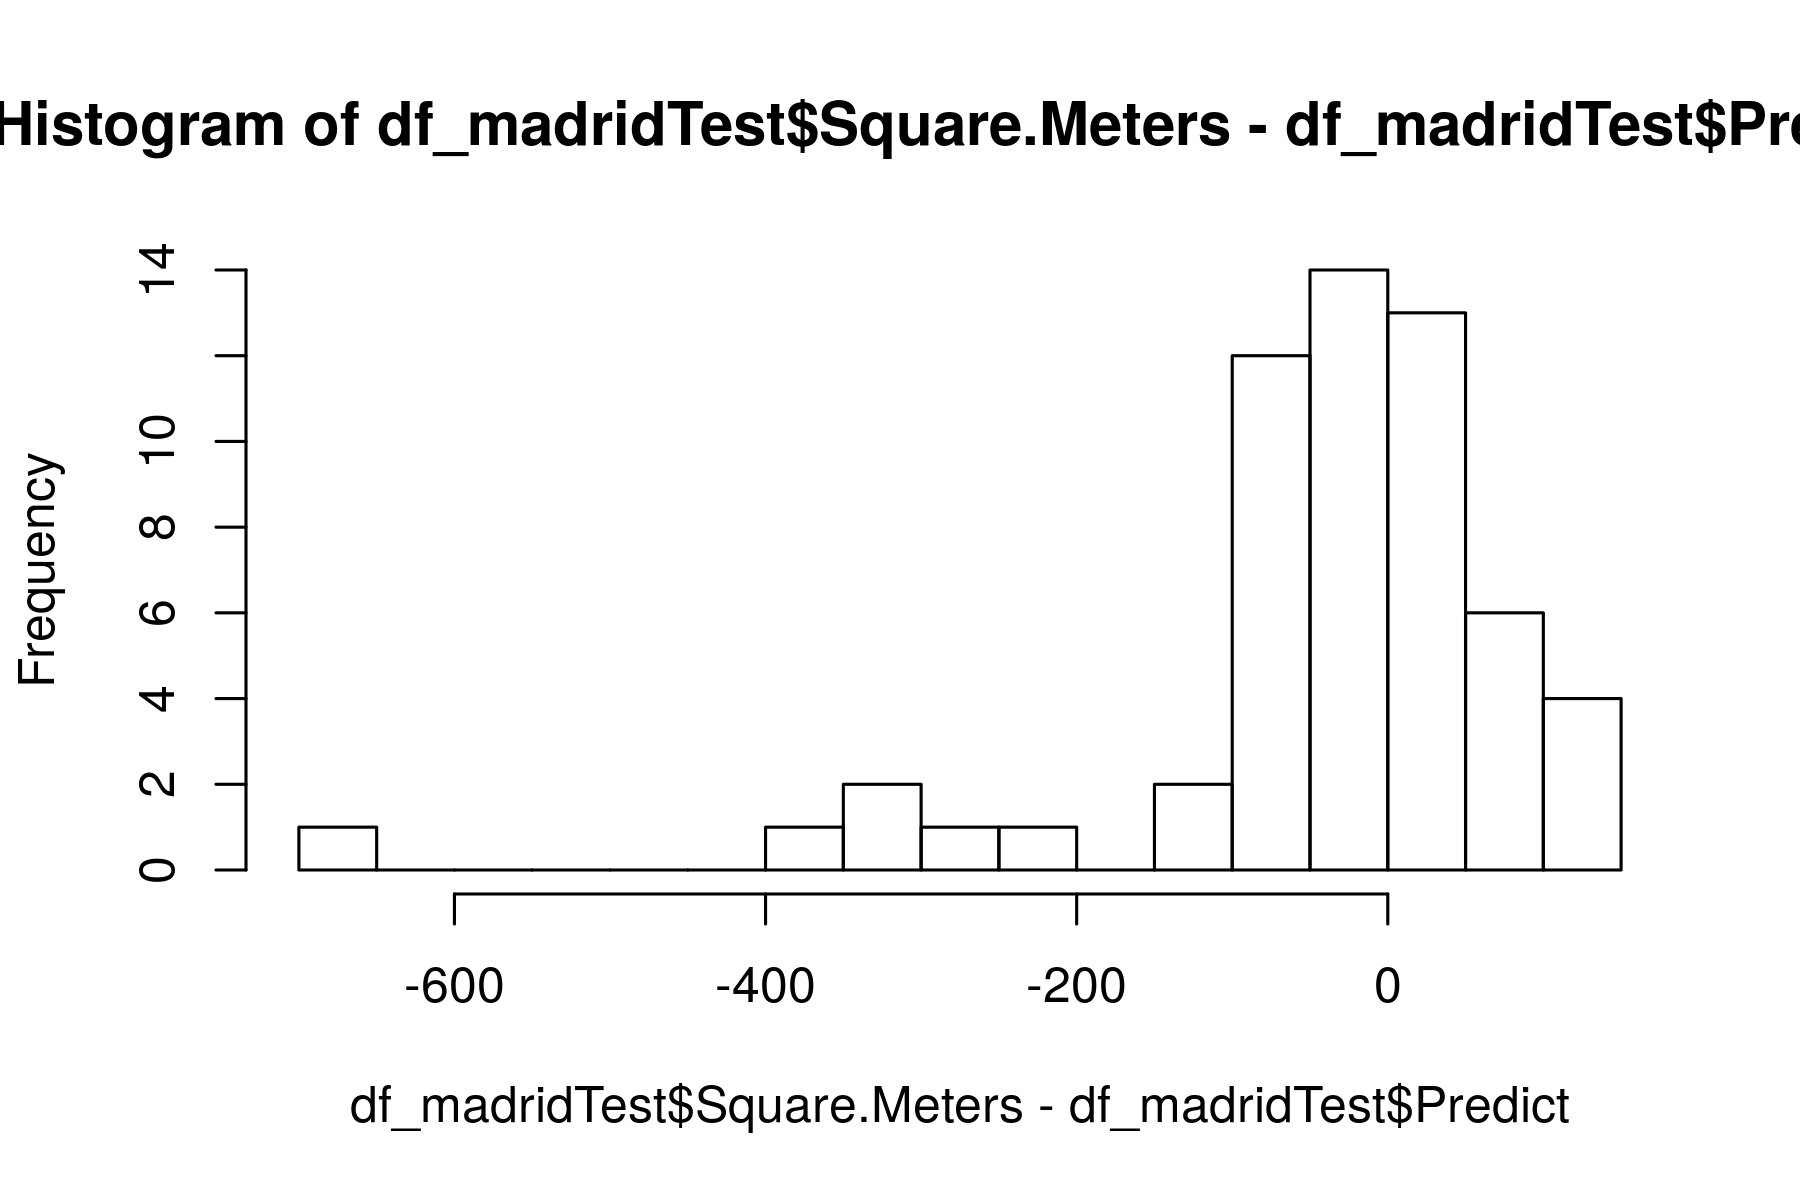

In [23]:
hist(df_madridTest$Square.Meters-df_madridTest$Predict,20)

Si tuvieramos un anuncio de un apartamento para 6 personas (Accommodates) con un precio de 80€/noche y 3 habitaciones en el barrio de Sol.
¿Cuantos metros cuadrados tendría?
¿Como varía sus metros cuadrados con cada habitación adicional?

In [24]:
library(tibble)
neighb_id_Sol <- unique(subset(df_madridTrain, Neighbourhood=="Sol")[, c("neighb_id")])
toPredict <- subset(df_madridTrain, neighb_id == 3 & Bedrooms == 3 & Price == 80)
newRow <- add_row(toPredict, Neighbourhood="Sol", Accommodates=6, Bedrooms=3, Bathrooms=1, Price=80, Beds = 2, neighb_id=neighb_id_Sol)
newRow$PredictMeters <- predict(modMadrid,newRow)
print(
    paste(
        "Los metros predichos para 6 personas, 3 habitaciones en el barrio del Sol a 80€ son:",
        round(newRow$PredictMeters, 2)
    )
)

[1] "Los metros predichos para 6 personas, 3 habitaciones en el barrio del Sol a 80€ son: 147.5"


In [25]:
newRow$Bedrooms <- 5
newRow$Bathrooms <- 1
newRow$PredictMeters <- predict(modMadrid,newRow)
print(
    paste(
        "Incrementando una habitación, vemos que no afecta",
        round(newRow$PredictMeters, 2)
    )
)

[1] "Incrementando una habitación, vemos que no afecta 147.5"


In [26]:
newRow$Bedrooms <- 4
newRow$Bathrooms <- 2
newRow$PredictMeters <- predict(modMadrid,newRow)
print(
    paste(
        "Sin embargo, como en mí modelo los baños tienen más relevancia, al aumentar en un baño sí aumentan los metros:",
        round(newRow$PredictMeters, 2)
    )
)

[1] "Sin embargo, como en mí modelo los baños tienen más relevancia, al aumentar en un baño sí aumentan los metros: 293.36"


In [27]:
print(
    paste(
        "Tengo un modelo sin bedrooms (habitaciones).",
        "Puede parecer raro, pero en todas las pruebas que he hecho no afecta positivamente en la mejora de R-squared",
        "Por lo tanto, aunque aumentemos una habitación no afecta demasiado, sin embargo si ampliamos los baños (bathrooms) sí"
    )
)

[1] "Tengo un modelo sin bedrooms (habitaciones). Puede parecer raro, pero en todas las pruebas que he hecho no afecta positivamente en la mejora de R-squared Por lo tanto, aunque aumentemos una habitación no afecta demasiado, sin embargo si ampliamos los baños (bathrooms) sí"


Rellenar los Square.Meters con valor NA con el estimado con el modelo anterior.

In [28]:
df_madrid$Square.Meters[is.na(df_madrid$Square.Meters)] <- predict(modMadrid, df_madrid[is.na(df_madrid$Square.Meters), ])
print("Aunque se ha reducido mucho, como se puede comprobar a continuación, aún hay NA porque el modelo es mejorable.")
df_madrid[is.na(df_madrid$Square.Meters), ]

[1] "Aunque se ha reducido mucho, como se puede comprobar a continuación, aún hay NA porque el modelo es mejorable."


,Neighbourhood,Accommodates,Bathrooms,Bedrooms,Beds,Price,Square.Feet,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters,neighb_id
,<fct>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
386,Argüelles,5,NA,1,1,65,NA,2,10,78,40.43033,-3.717796,NA,2
558,Carabanchel,2,NA,3,NA,79,NA,1,0,NA,40.38625,-3.741470,NA,3
566,Castellana,4,2,2,2,NA,NA,1,0,NA,40.43447,-3.682262,NA,3
715,Ciudad Lineal,6,NA,4,NA,300,NA,1,0,NA,40.46927,-3.664675,NA,3
1300,El Tréntaiseis,6,3,3,3,NA,NA,1,250,NA,40.41019,-3.671795,NA,3
1400,Embajadores,3,NA,1,2,55,0,2,10,86,40.40881,-3.700918,NA,4
1459,Embajadores,3,NA,1,1,62,NA,2,7,94,40.40956,-3.699566,NA,4
1709,Embajadores,6,NA,2,5,120,NA,4,10,87,40.41175,-3.699313,NA,4
1755,Embajadores,2,NA,1,NA,34,NA,1,6,88,40.40809,-3.700322,NA,4


Usar PCA para encontrar el apartamento más cercano a uno dado.

Este algoritmo nos ayudaría a dado un apartamento que el algoritmo nos devolvería los 5 apartamentos más similares.


Crearemos una función tal que le pasemos un apartamento con los siguientes datos:
* Accommodates	
* Bathrooms	
* Bedrooms	
* Beds	
* Price	
* Guests.Included	
* Extra.People	
* Review.Scores.Rating	
* Latitude	
* Longitude	
* Square.Meters

y nos devuelva los 5 más similares de:

In [29]:
#Creo el dataframe para PCA
dfToPCA <- na.omit(df_madrid[, c("Accommodates", "Bathrooms", "Bedrooms", "Beds", 
                               "Price", "Guests.Included", "Extra.People", "Review.Scores.Rating", 
                               "Latitude", "Longitude", "Square.Meters")])
#Obtengo el prcomp del dataframe
prPCA<-prcomp(dfToPCA,center = TRUE, scale = TRUE)

In [30]:
#Obtengo una fila para predecir
rowToPredict <- dfToPCA[sample(1:nrow(dfToPCA), 1), ]
#Obtengo la predicción de la fila
predictPCA <- predict(prPCA, rowToPredict)
#Calculo las distancias
dist <- rowSums((predictPCA[rep(1, times = nrow(prPCA$x)), ] - prPCA$x)^2)
print("La fila que queríamos predecir es:")
rowToPredict
print("Los 5 registros más cercanos al seleccionado serían:")
dfToPCA[order(dist)[2:6],]

[1] "La fila que queríamos predecir es:"


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
204,2,1,0,1,50,2,10,97,40.41198,-3.728571,93.75112


[1] "Los 5 registros más cercanos al seleccionado serían:"


,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests.Included,Extra.People,Review.Scores.Rating,Latitude,Longitude,Square.Meters
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
174,2,1,0,1,49,1,0,92,40.41373,-3.731136,93.46908
2770,2,1,0,1,54,2,0,94,40.40977,-3.713785,141.04436
305,2,1,1,1,59,2,10,97,40.42168,-3.718793,107.83072
326,3,1,0,1,60,2,10,92,40.42528,-3.716208,108.11275
2315,2,1,0,1,55,1,0,100,40.41317,-3.718100,95.16130


Bonus: ¿de todas las coordenadas PCA cual es la que mejor permite clasificar por id de barrio?

¿Por qué?